# Section 1- Report Header and Hypothesis

#### Report title: API Data Report

#### Name: Clare Rodgers

#### Date: 2025-10-08

## Hypothesis

Posts that get reposted receive more likes.

## Theoretical Rationale

I think that posts that get reposted receive more likes because when a post gets reposted, it receives more traction and more people see it.

## Statistical Application

I will test this hypothesis by looking at the charts from the data frame, paying most attention to the likeCount and repostCount columns to see if there is a correlation between the numbers.

# Section 2- Endpoint Plan

#### The Endpoints I am planning to use are:

- app.bsky.feed.searchPosts - to get a post ID so I can get the data for the repost and the amount of likes it has. 
- app.bsky.feed.getRepostedby - to see which accounts are reposting.
- app.bsky.feed.getLikes - to see how many likes the post has.


For app.bsky.feed.searchPosts, I am using it to find the uri and cid so I can fill it out when gathering the data for app.bsky.feed.getRepostedby and app.bsky.feed.getLikes. For the query ("q") I am using the topic of politics. 

For app.bsky.feed.getRepostedby, I am planning to extract the repostCount to see how many reposts the post has. This will help me test my hypothesis that posts that get more reposts receive more likes.

For app.bsky.feed.getLikes, I am planning to extract the likeCount to see how many likes the repost gets. This will help me to test my hypothesis that Posts that get more reposts receive more likes. I will comapre the like count with the repost count. 

## Reliablity and bias

This data could potentially be biased because if someone has a lot of followers, that could also get the post more likes, not just because someone else reposted it.

## Limitations

The missing information of the follower count might affect my analysis of the data.

# Section 3- Data Collection

First I am going to put in all the imports I need

In [27]:
import requests
import time
import json as js
import pandas as pd

BASE_URL = "https://api.bsky.app/xrpc"

## Data Collection (Endpoint 1)

I am going to start with app.bsky.feed.searchPosts. This is so I can get a post ID so I can fill out the required fields for the other endpoints.

In [28]:
endpoint = f"{BASE_URL}/app.bsky.feed.searchPosts"
headers = {"User-Agent": "EMAT-Teaching/1.0 (+contact@example.com)"}
params = {
    "q": "politics",
    "limit": 100, 
}

resp = requests.get(endpoint, params=params, headers=headers, timeout=30)

print("Status:", resp.status_code)

data = resp.json()

print("Top-level keys:", list(data.keys()))

Status: 200
Top-level keys: ['posts', 'cursor']


Originally, my topic was movies, but when I would bring up the table, only zeros would come up for the repostCount and likeCount, so I switched the query to politics, as I think that would be a more polarizing topic people would repost about. I also increased the limit number to try to fix the issue, so that I could get more posts to gather data from.  

Next, I am going to find the uri

In [29]:
posts = data.get("posts", []) or data.get("feed", [])
collected = []
collected.extend(posts)

cursor = data.get("cursor")
print(cursor)
print(len(collected))
print(collected[0])

100
100
{'uri': 'at://did:plc:onueric5crewjk4v5aocwvbn/app.bsky.feed.post/3m3b2lza4a22o', 'cid': 'bafyreig4k7f4hw6ra26rleqabc2rnsqdpua65wncqtmktlomnzqa6bxz2q', 'author': {'did': 'did:plc:onueric5crewjk4v5aocwvbn', 'handle': 'mikeup.bsky.social', 'displayName': 'Mike Upchurch', 'avatar': 'https://cdn.bsky.app/img/avatar/plain/did:plc:onueric5crewjk4v5aocwvbn/bafkreiad7v2qwu4rqhh2bpusqkxq3go3hucblxuuwdoj4idonhqkzo34ti@jpeg', 'associated': {'activitySubscription': {'allowSubscriptions': 'followers'}}, 'labels': [], 'createdAt': '2023-07-10T13:06:13.080Z'}, 'record': {'$type': 'app.bsky.feed.post', 'createdAt': '2025-10-15T20:13:57.369Z', 'langs': ['en'], 'reply': {'parent': {'cid': 'bafyreicqkdb5f24blj724k4wz7ywm7wkocm6vyvpegeo2mq3i2x5rns774', 'uri': 'at://did:plc:mspfwuzgrhhldnufkuchxni3/app.bsky.feed.post/3m3b2jqqqis2h'}, 'root': {'cid': 'bafyreihtkshwcsfhscsxwfezfuhat2hzflmgx6d6p6hclr4limwmfwj2e4', 'uri': 'at://did:plc:onueric5crewjk4v5aocwvbn/app.bsky.feed.post/3m3azpzdnm22g'}}, 'text

I am going to flatten the data to make it easier for myself to read.

In [30]:
rows = []

for p in posts:
    stats = {
        "post_uri": p.get("uri"),
        "post_cid": p.get("cid"),
        "text": p.get("record",{}).get("text"),
        "likeCount": p.get("likeCount"),
        "repostCount": p.get("repostCount"),
        "author_did": p.get("author").get("did"),
        "author_handle":p.get("author").get("handle"),
        "author_displayName": p.get("author").get("displayName"),
        
    }
    rows.append(stats)

posts_df = pd.DataFrame(rows)
posts_df.head(25)

,post_uri,post_cid,text,likeCount,repostCount,author_did,author_handle,author_displayName
0,at://did:plc:onueric5crewjk4v5aocwvbn/app.bsky...,bafyreig4k7f4hw6ra26rleqabc2rnsqdpua65wncqtmkt...,Everyone who thinks Trump is an aberration ins...,0,0,did:plc:onueric5crewjk4v5aocwvbn,mikeup.bsky.social,Mike Upchurch
1,at://did:plc:sluutnimqfqbhic4hmyq5nvc/app.bsky...,bafyreiclmlzr3tvq2wugeevvtpmhpia7tquzlsaicdssf...,"‘Look, so much of politics and making change h...",0,0,did:plc:sluutnimqfqbhic4hmyq5nvc,chriswallace.bsky.social,Chris Wallace
2,at://did:plc:3ehvpksq773niiopjxce22xi/app.bsky...,bafyreigjqyo4ae7k435m7dplomqofvobdjysz2vvi6chw...,I am not allowed to answer this in no politics...,0,0,did:plc:3ehvpksq773niiopjxce22xi,tslilhamagniva.bsky.social,Tslil Hamagniva 🎗️
3,at://did:plc:2mxsnsvgzeguiyjl2finwrcn/app.bsky...,bafyreieux4cwz3hednwtk6kdlfaino2ehyra6hcncin6i...,Republicans need to come back to work. While t...,0,0,did:plc:2mxsnsvgzeguiyjl2finwrcn,normajtorrres.bsky.social,
4,at://did:plc:xvngw3yc4ye3ecges7mfmva7/app.bsky...,bafyreidbzs4eq2tklhfj5x3enslmq7jzhfwvf5tgwceax...,Yeah that sucks. I would put it another way. P...,0,0,did:plc:xvngw3yc4ye3ecges7mfmva7,free-parking.bsky.social,Free Parking 🚘
5,at://did:plc:en2hlnwkmst4eisrwnuynpx7/app.bsky...,bafyreibiyjbjv7n2kserlx7dufcuyysf5ttsie2rukoqe...,This is why I've settled here. It started out ...,0,0,did:plc:en2hlnwkmst4eisrwnuynpx7,confessorprofessor.bsky.social,Confessio Amantis
6,at://did:plc:fw3nk23suehhjxrwwlk2bwfu/app.bsky...,bafyreiaba4ob4sfmdfrgk3bsmwcv7xsrfcp7gemqrhidm...,"Some people have a punchable face, this person...",0,0,did:plc:fw3nk23suehhjxrwwlk2bwfu,therollingtroll.bsky.social,Stijn
7,at://did:plc:jdeltinubdroaeosdsn5ocyt/app.bsky...,bafyreihiqgzmta4s4i6uv355tcq6sjcq5q2myg5rzxr4t...,#PMQs! What will Kemi Badenoch ask today?\n\nI...,0,0,did:plc:jdeltinubdroaeosdsn5ocyt,callidusdominus.bsky.social,Felix O'Kelly
8,at://did:plc:dhrwrm7saf5jfhbrx7pco3pz/app.bsky...,bafyreickyoixa4pot2jn3nmrmwlw7emxus6hp77ytgz5n...,If they weren't just like 'kill monster hur' a...,1,0,did:plc:dhrwrm7saf5jfhbrx7pco3pz,odin032402.bsky.social,WiserOdin
9,at://did:plc:gexi27c4c6eg3nguykdqydxw/app.bsky...,bafyreid7oyvsgury3jvnaddbgbsg5tvyenfh6iwxjowz5...,lol Alex spiking that job offer was some real ...,0,0,did:plc:gexi27c4c6eg3nguykdqydxw,ninjacate.blacksky.app,Cate Young


I increased the number of posts to display in the data frame so that it would not just be zeroes in the likesCount and repostCount columns (still mostly zeroes here but when I put in a higher number this program ran slower and would glitch a lot)

In [31]:
unique_uri = posts_df["post_uri"].dropna().unique().tolist()

In [32]:
print(unique_uri)

['at://did:plc:onueric5crewjk4v5aocwvbn/app.bsky.feed.post/3m3b2lza4a22o', 'at://did:plc:sluutnimqfqbhic4hmyq5nvc/app.bsky.feed.post/3m3b2lk64fk2t', 'at://did:plc:3ehvpksq773niiopjxce22xi/app.bsky.feed.post/3m3b2l35gks23', 'at://did:plc:2mxsnsvgzeguiyjl2finwrcn/app.bsky.feed.post/3m3b2k2csh22u', 'at://did:plc:xvngw3yc4ye3ecges7mfmva7/app.bsky.feed.post/3m3b2jg2lbs2t', 'at://did:plc:en2hlnwkmst4eisrwnuynpx7/app.bsky.feed.post/3m3b2jbslps2s', 'at://did:plc:fw3nk23suehhjxrwwlk2bwfu/app.bsky.feed.post/3m3b2j565ps23', 'at://did:plc:jdeltinubdroaeosdsn5ocyt/app.bsky.feed.post/3m3b2ixrges2i', 'at://did:plc:dhrwrm7saf5jfhbrx7pco3pz/app.bsky.feed.post/3m3b2i4agxs2l', 'at://did:plc:gexi27c4c6eg3nguykdqydxw/app.bsky.feed.post/3m3b2hq64o225', 'at://did:plc:sfgoiuy5junf2tpvjdqd6z24/app.bsky.feed.post/3m3b2hojyp22k', 'at://did:plc:fky3bthfnzam2u3gxycsz7t2/app.bsky.feed.post/3m3b2hmvzmc2h', 'at://did:plc:k5dpdxyprxwlrmgznubciz34/app.bsky.feed.post/3m3b2hwfqtt62', 'at://did:plc:3g6e2ta5sevhk3w6llzqvf6

I orginally was typing: unique_uri = posts_df["uri"].dropna().unique().tolist(), but I kept getting an error message. So I asked AI (ChatGPT) to help me figure out what was wrong, and it said "uri" did not exist in my data frame. So I changed it to "post_uri" because that it was it says in the data frame.

## Data Collection (Endpoint 2)

Next I am going to use the endpoint app.bsky.feed.getRepostedby.

In [33]:
'''
endpoint = f"{BASE_URL}/app.bsky.feed.getRepostedBy"
headers = {"User-Agent": "EMAT-Teaching/1.0 (+contact@example.com)"}
params = {
    "q": "movies",
    "uri": "at://did:plc:cdgczvc4sg4vjrajc6g5v2tw/app.bsky.feed.post/3m2xg63kvms2w",
    "cid": "bafyreig3chtztxq6lw5jbaofmrjmypkdc4lm7n6fdi4tmbrmopj5po6use",
    "limit": 10, 
    "cursor": "string",
}

resp = requests.get(endpoint, params=params, headers=headers, timeout=30)

print("Status:", resp.status_code)

data = resp.json()

print("Top-level keys:", list(data.keys()))
'''

## SRM
all_profiles = []
for d in unique_uri:
    params = []
    params.append(("uri", d))
    r = requests.get(f"{BASE_URL}/app.bsky.feed.getRepostedBy", params=params, timeout=30)
    data = r.json()
    #print(js.dumps(data, indent=2))

    #Append this profile to list all_profiles
    all_profiles.append({
        "uri": data.get("uri"),
        "repostCount": len(data.get("repostedBy"))           
    })

posts_df_1 = pd.DataFrame(all_profiles)
posts_df_1.head(5)

,uri,repostCount
0,at://did:plc:onueric5crewjk4v5aocwvbn/app.bsky...,0
1,at://did:plc:sluutnimqfqbhic4hmyq5nvc/app.bsky...,0
2,at://did:plc:3ehvpksq773niiopjxce22xi/app.bsky...,0
3,at://did:plc:2mxsnsvgzeguiyjl2finwrcn/app.bsky...,0
4,at://did:plc:xvngw3yc4ye3ecges7mfmva7/app.bsky...,0


The code in red that is commented out is originally what I had. I used the uri and the cid that I got from the endpoint searchPosts (See row 0 in chart), but that was only giving me data for one post. I had to use the code for flattening the data in order to show the uri for multiple posts, not just one.

## Data Collection (Endpoint 3)

This is for the getLikes endpoint

In [34]:
## SRM
all_likes = []
for d in unique_uri:
    params = []
    params.append(("uri", d))
    r = requests.get(f"{BASE_URL}/app.bsky.feed.getLikes", params=params, timeout=30)
    data = r.json()
    #print(js.dumps(data, indent=2))

    #Append this profile to list all_profiles
    all_likes.append({
        "uri": data.get("uri"),
        "likesCount": len(data.get("likes"))           
    })

likes_df_1 = pd.DataFrame(all_likes)
likes_df_1.head(5)

,uri,likesCount
0,at://did:plc:onueric5crewjk4v5aocwvbn/app.bsky...,0
1,at://did:plc:sluutnimqfqbhic4hmyq5nvc/app.bsky...,1
2,at://did:plc:3ehvpksq773niiopjxce22xi/app.bsky...,0
3,at://did:plc:2mxsnsvgzeguiyjl2finwrcn/app.bsky...,0
4,at://did:plc:xvngw3yc4ye3ecges7mfmva7/app.bsky...,0


# Section 4- Build DataFrames

I attempted to try to merge the repostCount and likeCount dataframes, however I kept getting errors. The repostCount and likeCount are in the same data frame for the searchPosts endpoint so instead I decided to make a scatterplot to help better analyze the data. 

I am going to import matplotlib and seaborn in order to make the scatterplot

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Relationship Between Amount of Reposts and Amount of Likes')

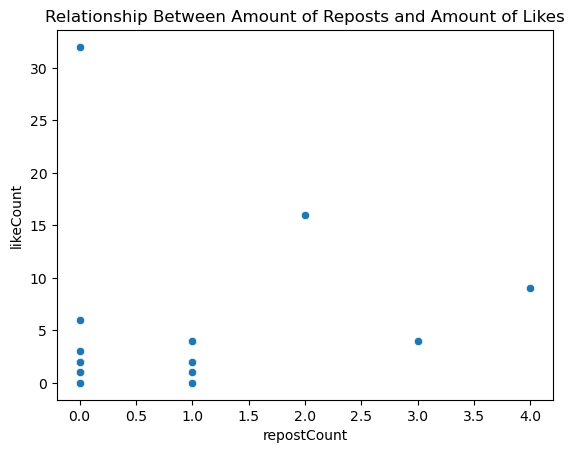

In [46]:
sns.scatterplot(x="repostCount", y="likeCount", data=posts_df)
plt.title("Relationship Between Amount of Reposts and Amount of Likes")

# Section 5- Conclusion

**My hypothesis was: Posts that get reposted receive more likes.** From looking at the scatterplot, it seems that on average, posts that get 0 reposts and posts that get 1 repost receive around the same amount of likes. Posts that get reposted 2 or more times on average seem to receive more likes than posts that are only reposted 1 time or not at all. (though, there are not a lot of posts in this data set that got reposted more than twice to prove this for certain). It is also worth mentioning the outlier that was not reposted at all but received over 30 likes. Next time I would test this hypothesis I might also take into account the amount of followers the person posting has.

I faced a lot of challenges making this report. For starters, I had a hard time collecting the data, as I would get a lot of errors when trying to flatten the data. I also struggled finding a query that would get me enough likes and reposts to test my hypothesis. I do not know much about BlueSky, so I do not know what topics are popular on there. Other topics I tried were movies and climate change. Politics gave me the most data to work with out of all of them. 

